# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
baseball=pd.read_csv('baseball.csv')

In [3]:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#Cleaning Columns
baseball.columns=['Wins','Runs','At_bats','Hits','Doubles','Triples','Home_runs','Walks','Strike_Outs','Stolen_bases','Runs_allowed','Earned_runs','Earned_run_avarage','Complete_games','Shoot_outs','Saves','Errors']

In [5]:
baseball.head()

,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Runs_allowed,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


That you may see the difference before cleansing and after cleansing columns 

In [6]:
baseball.shape

(30, 17)

30 rows and 17 colummns present in this dataset

And the target variable is Wins 

In [7]:
baseball.describe()

,Wins,Runs,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Runs_allowed,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Observations:

From here minimum runs is 573 and Maximum runs is 891.

Least Number of wins are 63 and Maximum number of wins are 100 .

Minimum doubles are 236 and Maximum doubles are 308

In strike_outs the difference between 75% and 100% is more in the sense it contains outliers 

In [8]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
Wins                  30 non-null int64
Runs                  30 non-null int64
At_bats               30 non-null int64
Hits                  30 non-null int64
Doubles               30 non-null int64
Triples               30 non-null int64
Home_runs             30 non-null int64
Walks                 30 non-null int64
Strike_Outs           30 non-null int64
Stolen_bases          30 non-null int64
Runs_allowed          30 non-null int64
Earned_runs           30 non-null int64
Earned_run_avarage    30 non-null float64
Complete_games        30 non-null int64
Shoot_outs            30 non-null int64
Saves                 30 non-null int64
Errors                30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


other than Earned_run_average every attribute information contains interger values and earned_run_avarage is in Float

# Exploratory Data analysis

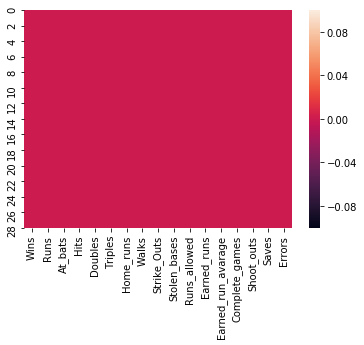

In [9]:
#to check null values
sns.heatmap(baseball.isnull())

It's clear that there is no null data is present in this dataset

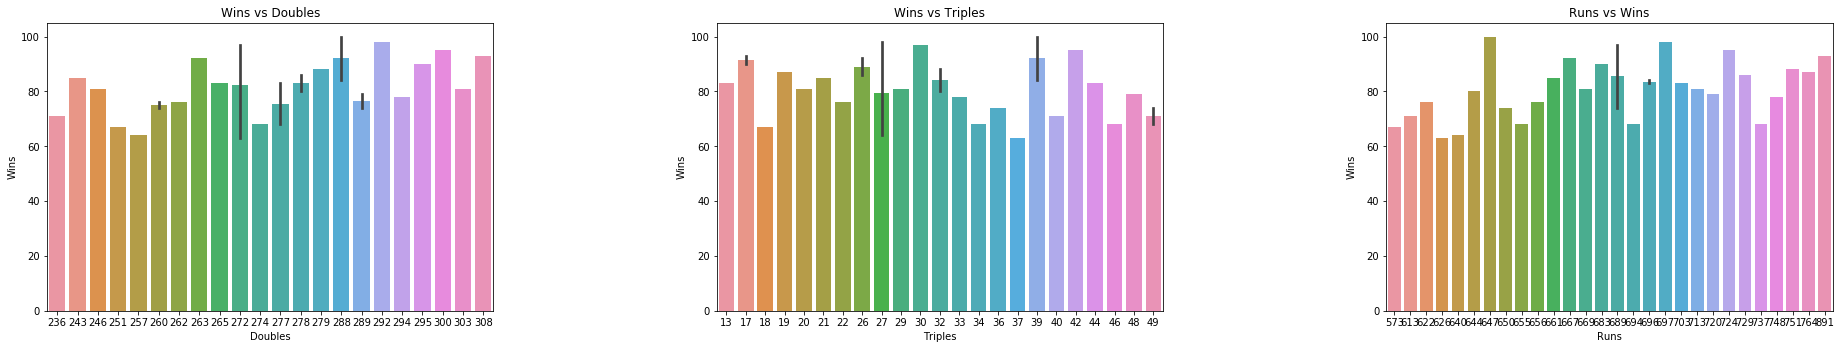

In [10]:
plt.figure(figsize=(32,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Wins vs Doubles')
sns.barplot(x="Doubles", y="Wins", data=baseball)
plt.subplot(132)
plt.title('Wins vs Triples')
sns.barplot(x="Triples", y="Wins", data=baseball)
plt.subplot(133)
plt.title('Runs vs Wins')
sns.barplot(x="Runs", y="Wins", data=baseball)

If doubles more chances of winning percentage is high and If triples are more than 13 chances of winning rate is high.

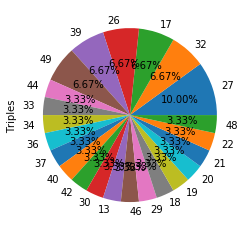

In [11]:
baseball['Triples'].value_counts().plot.pie(autopct="%2.2f%%")

Here we can observe one thing 10% of peoples have 27 triples.

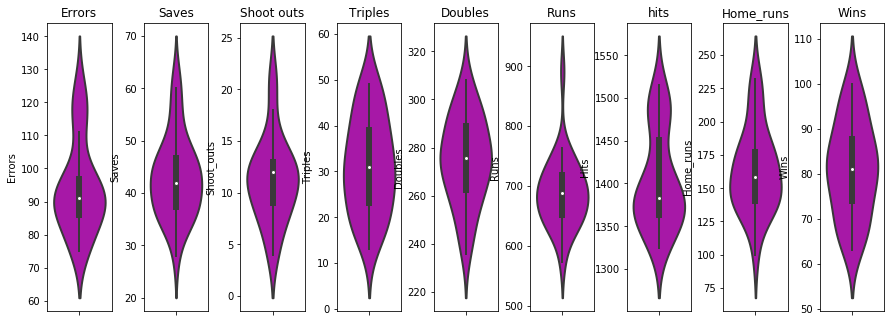

In [12]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(191)
plt.title('Errors')
sns.violinplot(y='Errors',data=baseball,color='m',linewidth=2)
plt.subplot(192)
plt.title('Saves')
sns.violinplot(y='Saves',data= baseball,color='m',linewidth=2)
plt.subplot(193)
plt.title('Shoot outs')
sns.violinplot(y='Shoot_outs',data=baseball,color='m',linewidth=2)
plt.subplot(194)
plt.title('Triples')
sns.violinplot(y='Triples',data=baseball,color='m',linewidth=2)
plt.subplot(195)
plt.title('Doubles')
sns.violinplot(y='Doubles',data=baseball,color='m',linewidth=2)
plt.subplot(196)
plt.title('Runs')
sns.violinplot(y='Runs',data=baseball,color='m',linewidth=2)
plt.subplot(197)
plt.title('hits')
sns.violinplot(y='Hits',data=baseball,color='m',linewidth=2)
plt.subplot(198)
plt.title('Home_runs')
sns.violinplot(y='Home_runs',data=baseball,color='m',linewidth=2)
plt.subplot(199)
plt.title('Wins')
sns.violinplot(y='Wins',data=baseball,color='m',linewidth=2)

From here we can observe that around 80 wins are depend on Errors value is in between 80-90 ,Saves range(40-50),Shoot_outs range(10-15),Triples range(20-40),Doubles range(260-280),Runs range(600-700),Hits range(1350-1400),Home_runs range(125-175 ) all these features range plays a key role while winning chances.

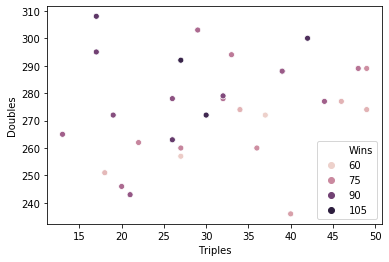

In [13]:
sns.scatterplot(x='Triples',y='Doubles',hue='Wins',data =baseball)

Triples increases Doubles automatically decreases and chances of winning rate automatically decreases.

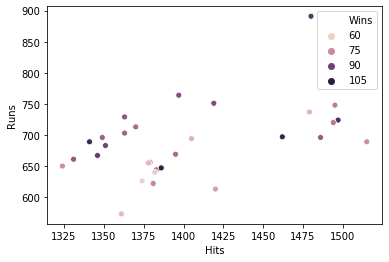

In [14]:
sns.scatterplot(x='Hits',y='Runs',hue='Wins',data =baseball)

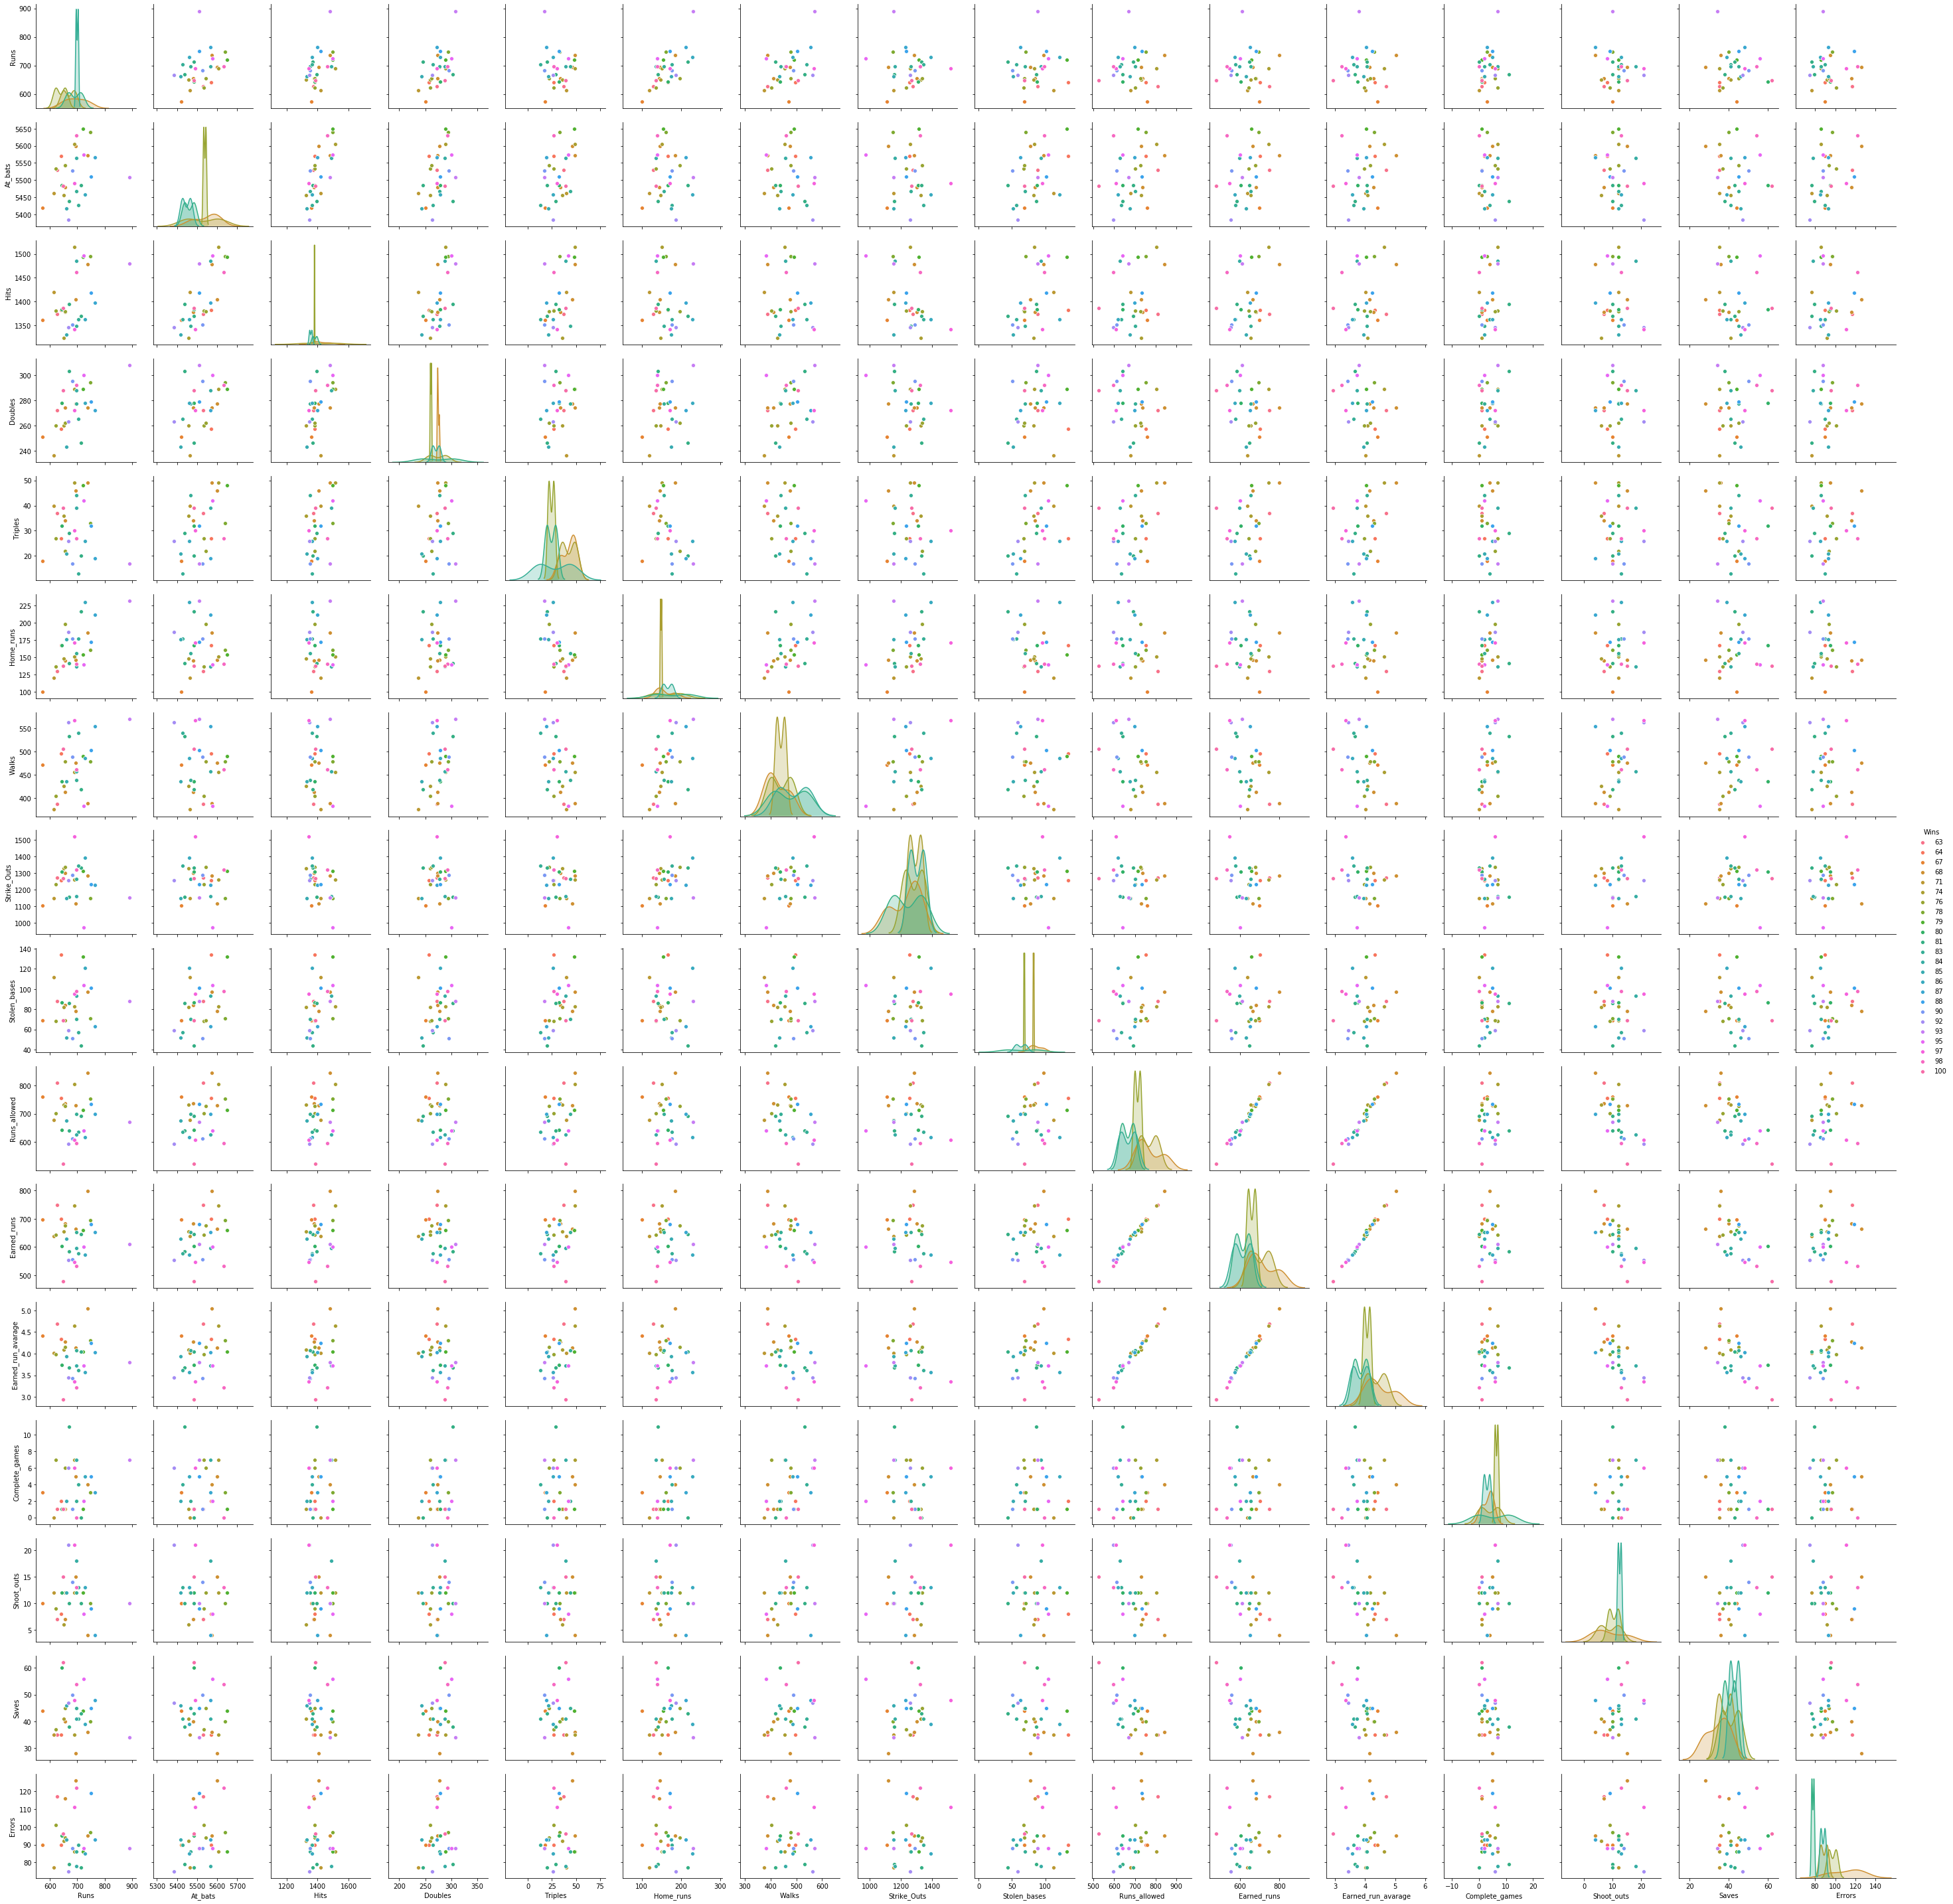

In [15]:
sns.pairplot(baseball ,hue ='Wins', vars =['Runs', 'At_bats', 'Hits', 'Doubles', 'Triples', 'Home_runs',
       'Walks', 'Strike_Outs', 'Stolen_bases', 'Runs_allowed', 'Earned_runs',
       'Earned_run_avarage', 'Complete_games', 'Shoot_outs', 'Saves',
       'Errors'])

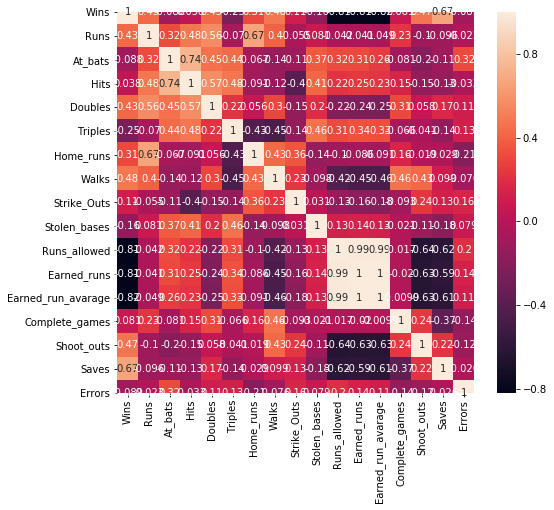

In [16]:
#to check Cor-relation
corr_hmap=baseball.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

At_bats is highly cor-related with Hits.

# Detecting and Removing Outliers

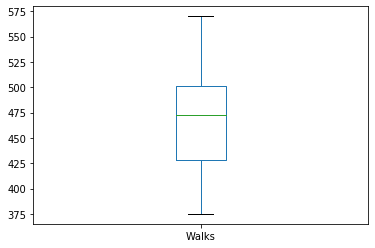

In [17]:
baseball['Walks'].plot.box()

Wins                     AxesSubplot(0.125,0.536818;0.065678x0.343182)
Runs                  AxesSubplot(0.203814,0.536818;0.065678x0.343182)
At_bats               AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Hits                  AxesSubplot(0.361441,0.536818;0.065678x0.343182)
Doubles               AxesSubplot(0.440254,0.536818;0.065678x0.343182)
Triples               AxesSubplot(0.519068,0.536818;0.065678x0.343182)
Home_runs             AxesSubplot(0.597881,0.536818;0.065678x0.343182)
Walks                 AxesSubplot(0.676695,0.536818;0.065678x0.343182)
Strike_Outs           AxesSubplot(0.755508,0.536818;0.065678x0.343182)
Stolen_bases          AxesSubplot(0.834322,0.536818;0.065678x0.343182)
Runs_allowed                AxesSubplot(0.125,0.125;0.065678x0.343182)
Earned_runs              AxesSubplot(0.203814,0.125;0.065678x0.343182)
Earned_run_avarage       AxesSubplot(0.282627,0.125;0.065678x0.343182)
Complete_games           AxesSubplot(0.361441,0.125;0.065678x0.343182)
Shoot_

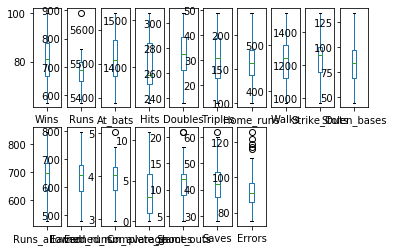

In [18]:
baseball.plot(kind='box',subplots=True,layout=(2,10))

you can observe here Runs ,Errors ,Saves shot_outs Earned_run_average has contains outliers and need to remove those outliers

In [19]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(baseball))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [20]:
threshold=3
np.where((z>3))

(array([5], dtype=int64), array([1], dtype=int64))

In [21]:
baseball_new=baseball[(z<3).all(axis=1)]#removing outliers

In [22]:
baseball_new.shape

(29, 17)

In [23]:
baseball.shape


(30, 17)

one row had been removed as outliers

# Check Distribution of Skewness

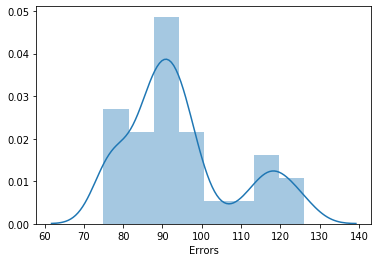

In [24]:
sns.distplot(baseball_new['Errors'])

In [25]:
collist=baseball_new.iloc[:,1:].columns
ncol=16
nrows=14

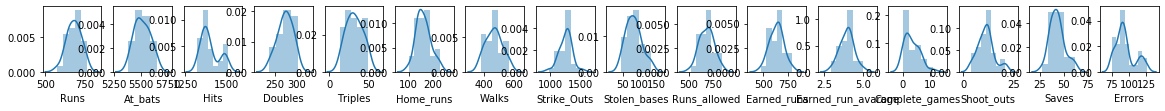

In [26]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(baseball_new[collist[i]])

Runs ,Stolen_bases,Home_runs Doubles and Triples are Normal distributed.

In [27]:
x=baseball_new.iloc[:,1:]
x.head()

,Runs,At_bats,Hits,Doubles,Triples,Home_runs,Walks,Strike_Outs,Stolen_bases,Runs_allowed,Earned_runs,Earned_run_avarage,Complete_games,Shoot_outs,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [28]:
y=baseball_new.iloc[:,:1]
y.head()

,Wins
0,95
1,83
2,81
3,76
4,74


In [29]:
x.skew()

Runs                 -0.215364
At_bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home_runs             0.450862
Walks                 0.151193
Strike_Outs          -0.233815
Stolen_bases          0.494966
Runs_allowed          0.018155
Earned_runs           0.018461
Earned_run_avarage    0.016693
Complete_games        0.854980
Shoot_outs            0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

Need to remove skewness of these features

In [30]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [31]:
x.skew()

Runs                 -0.215364
At_bats               0.169573
Hits                  0.738455
Doubles              -0.335304
Triples               0.090124
Home_runs             0.450862
Walks                 0.151193
Strike_Outs          -0.233815
Stolen_bases          0.494966
Runs_allowed          0.018155
Earned_runs           0.018461
Earned_run_avarage    0.016693
Complete_games       -0.275681
Shoot_outs            0.526943
Saves                 0.109983
Errors                0.586101
dtype: float64

Hits and Errors still there is a skewness .

# Building a MachineLearning Model

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [33]:
x_train.shape

(23, 16)

In [34]:
y_train.shape

(23, 1)

In [35]:
x_test.shape

(6, 16)

In [36]:
y_test.shape

(6, 1)

In [37]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_lr

array([[85.44401303],
       [82.91697265],
       [62.47527068],
       [78.62198956],
       [81.06819412],
       [94.28209215]])

In [38]:
lr.score(x_train,y_train)

0.9516499166682986

In [39]:
lr.coef_

array([[ 1.40368995e-01, -7.43610982e-02,  3.64948409e+01,
        -8.92496059e-02,  1.67797908e-02, -8.23362626e-02,
        -3.06159526e-02, -4.03628490e-03, -5.39526583e-02,
         5.30962198e-02,  8.51684927e-01, -1.53859089e+02,
         2.58833267e+00,  2.63768273e-01,  1.85849234e+01,
        -9.64724481e-01]])

In [40]:
lr.intercept_

array([150.41030817])

In [41]:
pred=lr.predict(x_test)
print("predicted wins",pred_lr)
print("actual wins",y_test)

predicted wins [[85.44401303]
 [82.91697265]
 [62.47527068]
 [78.62198956]
 [81.06819412]
 [94.28209215]]
actual wins     Wins
1     83
11    86
29    68
3     76
13    76
25    92


In [42]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_lr)))

error:
mean absolute error: 3.5040075873926355
root mean squared error: 3.73653709568724


In [43]:
#r2 score-->coefficient of determination
#is the proportion of the variance in the dependent variabel that is predictable from the independent variable (s)
#i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print("R-Square",r2_score(y_test,pred_lr))
print('mean squared error:',mean_squared_error(y_test,pred_lr))

R-Square 0.7703876012662924
mean squared error: 13.961709467446836


I think it's good R-Square is 77% and mean square error also good which is 14 and is low 

# Saving Model

In [44]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(lr,'baseball.obj')
#load the model from a file
dct_from_joblib=joblib.load('baseball.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([[85.44401303],
       [82.91697265],
       [62.47527068],
       [78.62198956],
       [81.06819412],
       [94.28209215]])